In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re   #manipulating regular expression

In [2]:
url="https://www.hubertiming.com/results/2022Wyeast" #open link
html=urlopen(url)

In [3]:
soup=BeautifulSoup(html)  #soup=BeautifulSoup(html,"lxml")

In [4]:
title=soup.title
print(title)
print(title.text)

<title>Race results for the 2022 Wy'East Wonder 50M 50K!</title>
Race results for the 2022 Wy'East Wonder 50M 50K!


In [5]:
links=soup.find_all('a')
print(links)

[<a href="https://gobeyondracing.com/" target="_blank">Go Beyond Racing</a>, <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>, <a href="https://www.hubertiming.com">Huber Timing Home</a>, <a class="btn btn-primary btn-lg" href="/results/2022WyEast50K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 50K</a>, <a class="btn btn-primary btn-lg" href="/results/summary/2022WyEast" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>, <a id="individual" name="individual"></a>, <a data-url="/results/2022WyEast" href="#tabs-1" id="rootTab" style="font-size: 18px">50 Miler Results</a>, <a href="https://www.hubertiming.com/"><img height="65" src="https://www.hubertiming.com//sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>, <a href="https://facebook.com/hubertiming/"><img src="https://www.hubertiming.com/results/FB-f-Logo__blue_50.png"/></a>, <a class="sma

In [6]:
links=soup.find_all('a',href=True)
for link in links:
    print(link['href'])

https://gobeyondracing.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2022WyEast50K
/results/summary/2022WyEast
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [7]:
links=soup.find_all('a',href=True)
for link in links:
    print(link.get("href"))

https://gobeyondracing.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2022WyEast50K
/results/summary/2022WyEast
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [8]:
allrows=soup.find_all("tr")
print(allrows[:5])

[<tr colspan="2">
<b>50 Miler:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>97</td>
</tr>, <tr>
<td>Male:</td>
<td>59</td>
</tr>, <tr>
<td>Female:</td>
<td>38</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Division</th>
<th>Division Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>]


In [9]:
allrows=soup.find_all("tr")
for row in allrows:
    row_list=row.find_all("td")
print(row_list)

[<td>97</td>, <td>579</td>, <td>

                    JOSH KORNEGAY

                </td>, <td>M</td>, <td>42</td>, <td>PORTLAND</td>, <td>OR</td>, <td>13:44:20</td>, <td>16:29</td>, <td>

                    59 of 59

                </td>, <td>M 40-49</td>, <td>

                    23 of 23

                </td>, <td>0:23</td>, <td>13:44:43</td>]


In [10]:
allrows=soup.find_all("tr")
for row in allrows:
    row_list=row.find_all("td")
print(row_list)
for cell in row_list:
    print(cell.text)

[<td>97</td>, <td>579</td>, <td>

                    JOSH KORNEGAY

                </td>, <td>M</td>, <td>42</td>, <td>PORTLAND</td>, <td>OR</td>, <td>13:44:20</td>, <td>16:29</td>, <td>

                    59 of 59

                </td>, <td>M 40-49</td>, <td>

                    23 of 23

                </td>, <td>0:23</td>, <td>13:44:43</td>]
97
579


                    JOSH KORNEGAY

                
M
42
PORTLAND
OR
13:44:20
16:29


                    59 of 59

                
M 40-49


                    23 of 23

                
0:23
13:44:43


In [11]:
data=[]
allrows=soup.find_all("tr")
for row in allrows:
    row_list=row.find_all("td")
    dataRow=[]
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
print(data)

[[], ['Finishers:', '97'], ['Male:', '59'], ['Female:', '38'], [], ['1', '684', '\r\n\r\n                    DYLAN BOWMAN\r\n\r\n                ', 'M', '36', 'PORTLAND', 'OR', '7:11:46', '8:38', '\r\n\r\n                    1 of 59\r\n\r\n                ', 'M Overall', '\r\n\r\n                    1 of 3\r\n\r\n                ', '0:01', '7:11:47'], ['2', '572', '\r\n\r\n                    RYAN KAISER\r\n\r\n                ', 'M', '43', 'BEND', 'OR', '7:22:57', '8:51', '\r\n\r\n                    2 of 59\r\n\r\n                ', 'M Overall', '\r\n\r\n                    2 of 3\r\n\r\n                ', '0:02', '7:22:59'], ['3', '615', '\r\n\r\n                    JAKE NOWOSATKA\r\n\r\n                ', 'M', '31', 'SEATTLE', 'WA', '8:11:01', '9:49', '\r\n\r\n                    3 of 59\r\n\r\n                ', 'M Overall', '\r\n\r\n                    3 of 3\r\n\r\n                ', '0:02', '8:11:03'], ['4', '540', '\r\n\r\n                    YASSINE DIBOUN\r\n\r\n            

In [12]:
data=[]
allrows=soup.find_all("tr")
for row in allrows:
    row_list=row.find_all("td")
    dataRow=[]
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
titles=data[:3]
data=data[1:]
print(titles)
print(data[-2:])

[[], ['Finishers:', '97'], ['Male:', '59']]
[['96', '638', '\r\n\r\n                    VICKI ROMANIN\r\n\r\n                ', 'F', '61', 'WHISTLER', 'BC', '13:43:47', '16:28', '\r\n\r\n                    38 of 38\r\n\r\n                ', 'F 60-69', '\r\n\r\n                    1 of 1\r\n\r\n                ', '0:22', '13:44:10'], ['97', '579', '\r\n\r\n                    JOSH KORNEGAY\r\n\r\n                ', 'M', '42', 'PORTLAND', 'OR', '13:44:20', '16:29', '\r\n\r\n                    59 of 59\r\n\r\n                ', 'M 40-49', '\r\n\r\n                    23 of 23\r\n\r\n                ', '0:23', '13:44:43']]


In [13]:
df=pd.DataFrame(data)
print(df.head(2))   # print(data)
print(df.tail(2))

           0   1     2     3     4     5     6     7     8     9     10    11  \
0  Finishers:  97  None  None  None  None  None  None  None  None  None  None   
1       Male:  59  None  None  None  None  None  None  None  None  None  None   

     12    13  
0  None  None  
1  None  None  
     0    1                                                  2  3   4   \
99   96  638  \r\n\r\n                    VICKI ROMANIN\r\n\...  F  61   
100  97  579  \r\n\r\n                    JOSH KORNEGAY\r\n\...  M  42   

           5   6         7      8   \
99   WHISTLER  BC  13:43:47  16:28   
100  PORTLAND  OR  13:44:20  16:29   

                                                    9        10  \
99   \r\n\r\n                    38 of 38\r\n\r\n  ...  F 60-69   
100  \r\n\r\n                    59 of 59\r\n\r\n  ...  M 40-49   

                                                    11    12        13  
99   \r\n\r\n                    1 of 1\r\n\r\n    ...  0:22  13:44:10  
100  \r\n\r\n         

In [14]:
col_headers=soup.find_all('th')
col_headers

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>Age</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Time</th>,
 <th>Chip Pace</th>,
 <th>Gender Place</th>,
 <th>Division</th>,
 <th>Division Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>]

In [15]:
header_list=[]
col_headers=soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Division', 'Division Place', 'Time to Start', 'Gun Time']


In [16]:
df.columns=header_list
print(df.head())

        Place   Bib                                               Name Gender  \
0  Finishers:    97                                               None   None   
1       Male:    59                                               None   None   
2     Female:    38                                               None   None   
3        None  None                                               None   None   
4           1   684  \r\n\r\n                    DYLAN BOWMAN\r\n\r...      M   

    Age      City State Chip Time Chip Pace  \
0  None      None  None      None      None   
1  None      None  None      None      None   
2  None      None  None      None      None   
3  None      None  None      None      None   
4    36  PORTLAND    OR   7:11:46      8:38   

                                        Gender Place   Division  \
0                                               None       None   
1                                               None       None   
2                            

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Place           100 non-null    object
 1   Bib             100 non-null    object
 2   Name            97 non-null     object
 3   Gender          97 non-null     object
 4   Age             97 non-null     object
 5   City            97 non-null     object
 6   State           97 non-null     object
 7   Chip Time       97 non-null     object
 8   Chip Pace       97 non-null     object
 9   Gender Place    97 non-null     object
 10  Division        97 non-null     object
 11  Division Place  97 non-null     object
 12  Time to Start   97 non-null     object
 13  Gun Time        97 non-null     object
dtypes: object(14)
memory usage: 11.2+ KB


In [18]:
df.shape

(101, 14)

In [19]:
df2=df.dropna(how='any')
df2.shape

(97, 14)

In [30]:
df2['ChipTime_minutes']=pd.to_timedelta(df2['Chip Time'])
df2['ChipTime_minutes']=df2['ChipTime_minutes'].astype('timedelta64[s]')/60
df2[['ChipTime_minutes']].info()
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 100
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ChipTime_minutes  97 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB
  Place  Bib                                               Name Gender Age  \
4     1  684  \r\n\r\n                    DYLAN BOWMAN\r\n\r...      M  36   
5     2  572  \r\n\r\n                    RYAN KAISER\r\n\r\...      M  43   
6     3  615  \r\n\r\n                    JAKE NOWOSATKA\r\n...      M  31   
7     4  540  \r\n\r\n                    YASSINE DIBOUN\r\n...      M  43   
8     5  594  \r\n\r\n                    STACEY MARION\r\n\...      F  33   

         City State Chip Time Chip Pace  \
4    PORTLAND    OR   7:11:46      8:38   
5        BEND    OR   7:22:57      8:51   
6     SEATTLE    WA   8:11:01      9:49   
7    PORTLAND    OR   8:26:42     10:08   
8  NORTH BEND    WA   8:28:31   

C:\Users\Soumya\AppData\Local\Temp/ipykernel_6964/3929928134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ChipTime_minutes']=pd.to_timedelta(df2['Chip Time'])
C:\Users\Soumya\AppData\Local\Temp/ipykernel_6964/3929928134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ChipTime_minutes']=df2['ChipTime_minutes'].astype('timedelta64[s]')/60


In [21]:
df2['ChipTime_minutes']=pd.to_timedelta(df2['Chip Time'])
df2['ChipTime_minutes']=df2['ChipTime_minutes'].astype('timedelta64[s]')/60
print(df2[['Gender','ChipTime_minutes']].head())
print(df2[['Gender','ChipTime_minutes']].tail())

  Gender  ChipTime_minutes
4      M        431.766667
5      M        442.950000
6      M        491.016667
7      M        506.700000
8      F        508.516667
    Gender  ChipTime_minutes
96       M        811.866667
97       F        811.883333
98       M        815.533333
99       F        823.783333
100      M        824.333333


C:\Users\Soumya\AppData\Local\Temp/ipykernel_6964/239325173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ChipTime_minutes']=pd.to_timedelta(df2['Chip Time'])
C:\Users\Soumya\AppData\Local\Temp/ipykernel_6964/239325173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ChipTime_minutes']=df2['ChipTime_minutes'].astype('timedelta64[s]')/60


Text(0.5, 1.0, 'Comparison of average minutes run by male and female')

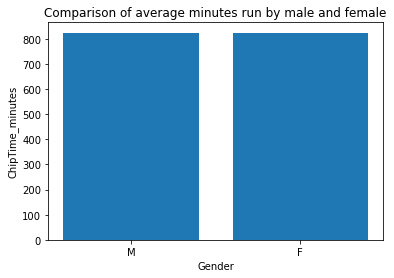

In [22]:
plt.bar(df2['Gender'],df2['ChipTime_minutes'])
plt.xlabel('Gender')
plt.ylabel('ChipTime_minutes')
plt.title("Comparison of average minutes run by male and female")

In [23]:
df2.describe(include=[np.number])

,ChipTime_minutes
count,97.000000
mean,677.477320
std,89.410858
min,431.766667
25%,610.516667
50%,688.533333
75%,737.400000
max,824.333333


<AxesSubplot:>

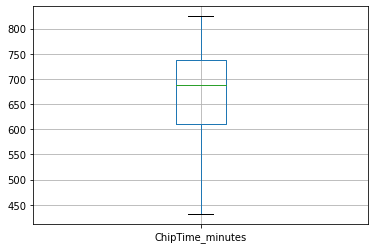

In [24]:
df2.boxplot(column='ChipTime_minutes')

Text(0, 0.5, 'Run time')

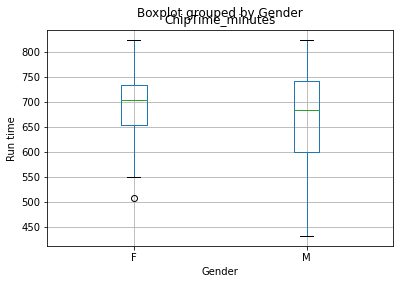

In [25]:
df2.boxplot(column='ChipTime_minutes',by='Gender')
plt.ylabel('Run time')

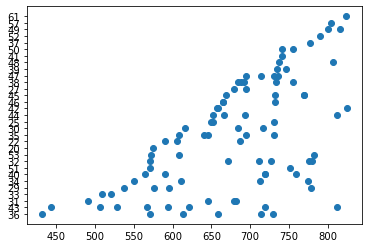

In [26]:
# age vs chip time in minutes
plt.scatter(df2['ChipTime_minutes'],df2['Age'])
plt.show()

C:\Users\Soumya\AppData\Local\Temp/ipykernel_6964/2275794889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age_i']=round(pd.to_numeric(df2['Age'],errors='coerce'))            # coerce is real value but no value


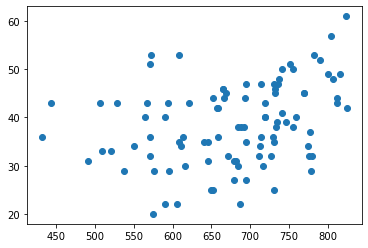

In [38]:
df2['Age_i']=round(pd.to_numeric(df2['Age'],errors='coerce'))            # coerce is real value but no value
df2.dropna(how='any',inplace=True)
plt.scatter(df2['ChipTime_minutes'],df2['Age_i'])
plt.show()